<a href="https://colab.research.google.com/github/paigemb4/DS1002/blob/main/notes/mar20_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data cleaning

In [36]:
import pandas as pd
import numpy as np

In [3]:
study = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/study.csv')
categories = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/blood_categories.csv')

In [4]:
study

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
4,Keith,12/17/19,Z+
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


In [5]:
categories
#list of legal bloodtypes (possible outputs)

,blood_type
0,O-
1,O+
2,A-
3,A+
4,B+
5,B-
6,AB+
7,AB-


In [ ]:
#antijoin is like a-b, only one side of the venn diagram
#inner joins is the intersection - middle of the venn diagram

In [8]:
type(study['blood_type'])

pandas.core.series.Series

In [10]:
#.set() and .difference() are python not pandas

In [14]:
inconsistent_categories = set(study['blood_type']).difference(categories['blood_type'])
inconsistent_categories
#difference is something that can be performed on a set

{'Z+'}

In [15]:
type(inconsistent_categories)

set

In [12]:
inconsistent_rows = study['blood_type'].isin(inconsistent_categories) # gives a boolean series
study[inconsistent_rows] # subset study dataframe based on boolean values


,name,birthday,blood_type
4,Keith,12/17/19,Z+


In [13]:
consistent_data = study[~inconsistent_rows]
consistent_data
#use this to drop inconsistent rows
#~ kind of acts like a negation

,name,birthday,blood_type
0,Beth,10/20/19,B-
1,Paul,7/8/20,A-
2,Helen,8/12/19,O+
3,Jennifer,3/17/19,O-
5,Kelly,4/27/20,A+
6,Rachel,4/19/19,AB+


fixing value inconsistency

In [16]:
# import `marriage_status` dataset
marriage = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/marriage_status.csv')

In [18]:
marriage.head()

,marriage_status
0,divorced
1,separated
2,married
3,UNMARRIED
4,MARRIED


In [19]:
marriage['marriage_status'].value_counts()

married      6
unmarried    4
divorced     3
separated    3
UNMARRIED    3
MARRIED      2
Name: marriage_status, dtype: int64

In [20]:
#to capitalize:
marriage['marriage_status'] = marriage['marriage_status'].str.upper()
marriage['marriage_status'].value_counts()

MARRIED      8
UNMARRIED    7
DIVORCED     3
SEPARATED    3
Name: marriage_status, dtype: int64

In [21]:
# to lowercase
marriage['marriage_status'] = marriage['marriage_status'].str.lower()
marriage['marriage_status'].value_counts()

married      8
unmarried    7
divorced     3
separated    3
Name: marriage_status, dtype: int64

turns data into categories

In [22]:
income = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/income.csv')
income

,household_income
0,88000
1,47000
2,155000
3,147000
4,250000
5,107000
6,700000
7,120000
8,90000
9,33000


In [46]:
#.qcut()automatically divides data into categories based on the argument q and the distribution of data
#q= how many u want
group_names = ['0-100K', '100K-250K', '250K-500K', '500K+']
income['income_group'] = pd.qcut(income['household_income'], q = 4,labels = group_names)

income

,household_income,income_group
0,88000,100K-250K
1,47000,0-100K
2,155000,500K+
3,147000,250K-500K
4,250000,500K+
5,107000,100K-250K
6,700000,500K+
7,120000,250K-500K
8,90000,100K-250K
9,33000,0-100K


In [43]:
ranges = [0, 100000, 500000, np.inf]
group_names = ['0-100K', '100K-500K', '500K+']
income['income_group'] = pd.cut(income['household_income'], bins = ranges,
                                     labels = group_names)

income

,household_income,income_group
0,88000,0-100K
1,47000,0-100K
2,155000,100K-500K
3,147000,100K-500K
4,250000,100K-500K
5,107000,100K-500K
6,700000,500K+
7,120000,100K-500K
8,90000,0-100K
9,33000,0-100K


In [48]:
computer = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/computer.csv')
computer

,operating_system
0,Microsoft
1,MacOS
2,IOS
3,Android
4,Linux
5,Linux
6,IOS
7,Microsoft
8,Microsoft
9,MacOS


In [49]:
# create dictionary
mapping = {'Microsoft': 'DesktopOS', 'MacOS': 'DesktopOS', 'Linux': 'DesktopOS', 'IOS': 'MobileOS', 'Android': 'MobileOS'}

# use `.replace`
computer['operating_system_category'] = computer['operating_system'].replace(mapping)
computer['operating_system_category'].unique()

array(['DesktopOS', 'MobileOS'], dtype=object)

In [50]:
computer.head()

,operating_system,operating_system_category
0,Microsoft,DesktopOS
1,MacOS,DesktopOS
2,IOS,MobileOS
3,Android,MobileOS
4,Linux,DesktopOS


text data

biggest problem is normally typos, can be inconsistent

In [51]:
phones = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers.csv')
phones

,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,+1-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


In [52]:
# Replace the '+' with '00'
phones['phone_number'] = phones['phone_number'].str.replace('+', '00')
phones

<ipython-input-52-d8697e0de045>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  phones['phone_number'] = phones['phone_number'].str.replace('+', '00')


,full_name,phone_number
0,Noelani A. Gray,001-702-397-5143
1,Myles Z. Gomez,001-329-485-0540
2,Gil B. Silva,001-195-492-2338
3,Prescott D. Hardin,001-297-996-4904
4,Benedict G. Valdex,001-969-820-3536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,001-536-175-8444
7,Hedley I. Logan,001-681-552-1823
8,Jack W. Carrillo,001-910-323-5265
9,Lionel M. Davis,001-143-119-9210


In [53]:
# Replace the '-' with nothing
phones['phone_number'] = phones['phone_number'].str.replace('-', '')
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,4138
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [54]:
# Replace phone numbers with lower than 10 digits to NaN
digits = phones['phone_number'].str.len() # gets the length of the each phone number
phones.loc[digits < 10, 'phone_number'] = np.nan # subset phone numbers with less than 10 digits, replace with NaN
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


In [57]:
# checking data with assert statements

# find length of each row in phone_number columns
sanity_check = phones['phone_number'].str.len()

# assert minimum phone_number lenth is 10
assert sanity_check.min() >= 10

# assert all number do not have a '+' or '-'
assert phones['phone_number'].str.contains('-').any() == False
assert phones['phone_number'].str.contains('\+').any() == False

#second line doesn't work because the computer interprets '+' as a special character- result of regular expressions
#to interpret as + but a backslash infront

In [58]:
phones

,full_name,phone_number
0,Noelani A. Gray,0017023975143
1,Myles Z. Gomez,0013294850540
2,Gil B. Silva,0011954922338
3,Prescott D. Hardin,0012979964904
4,Benedict G. Valdex,0019698203536
5,Reece M. Andrews,NaN
6,Hayfa E. Keith,0015361758444
7,Hedley I. Logan,0016815521823
8,Jack W. Carrillo,0019103235265
9,Lionel M. Davis,0011431199210


more complex regular expression examples

In [59]:
phones_complex = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/phone_numbers_complex.csv')
phones_complex

,full_name,phone_number
0,Olga Robinson,+(01706)-25891
1,Justina Kim,+0500-571437
2,Tamekah Henson,+0800-1111
3,Miranda Solis,+07058-979063
4,Caldwell Gilliam,+(016977)-8424


In [60]:
# replace letters with nothing

phones_complex['phone_number'] = phones_complex['phone_number'].str.replace('[^0-9]', '')
#phones_complex['phone_number'] = phones_complex['phone_number'].str.replace(r'\D+', '') #\D+ mean anything that is not a digit, found in regex library
phones_complex

<ipython-input-60-89b10a1c9237>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  phones_complex['phone_number'] = phones_complex['phone_number'].str.replace('[^0-9]', '')


,full_name,phone_number
0,Olga Robinson,0170625891
1,Justina Kim,0500571437
2,Tamekah Henson,08001111
3,Miranda Solis,07058979063
4,Caldwell Gilliam,0169778424


data uniformity

In [61]:
temps = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/temperatures.csv')
temps.head()

,date,temperature
0,2019-03-03,14.0
1,2019-03-04,15.0
2,2019-03-05,18.0
3,2019-03-06,16.0
4,2019-03-07,62.6


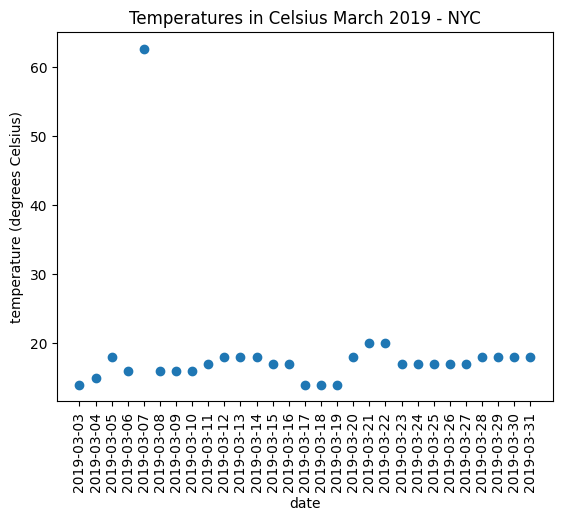

In [62]:
import matplotlib.pyplot as plt

plt.scatter(x = 'date', y = 'temperature', data = temps)
plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)

plt.show()

In [63]:
#convert F to C
temp_fah = temps.loc[temps['temperature'] > 40, 'temperature'] # use .loc to subset data above 40

temp_cels = (temp_fah - 32) * (5/9) # convert to celsius

temps.loc[temps['temperature'] > 40, 'temperature'] = temp_cels

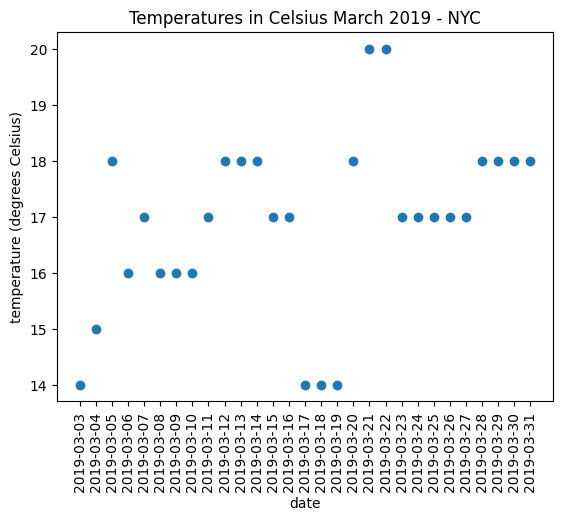

In [64]:
plt.scatter(x = 'date', y = 'temperature', data = temps)

plt.title('Temperatures in Celsius March 2019 - NYC')
plt.xlabel('date')
plt.ylabel('temperature (degrees Celsius)')
plt.xticks(rotation = 90)
plt.show()

clean up dates

In [65]:
birthdays = pd.read_csv('https://ds1002-resources.s3.amazonaws.com/data/birthdays.csv')
birthdays.head()

,birth_date,first_name,last_name
0,27/27/2019,Rowan,Nunez
1,3/29/19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,6/3/19,Griffith,Neal


In [66]:
# converts to datetime
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'])
#doesnt work

DateParseError: Invalid date specified (27/27) present at position 0

In [67]:
birthdays['birth_date'] = pd.to_datetime(birthdays['birth_date'],
                                        # attempt to infer format for each date
                                        infer_datetime_format = True,
                                        # return NA for rows where conversion failed
                                        errors = 'coerce')

In [68]:
birthdays
#nat = not a time

,birth_date,first_name,last_name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


In [69]:
birthdays['birth_date'] = birthdays['birth_date'].dt.strftime('%d-%m-%Y')
birthdays

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,birth_date,first_name,last_name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal
